In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from prophet import Prophet

In [3]:
data = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
data['FullDate'] = pd.to_datetime(data['FullDate'])
data.set_index('FullDate', inplace = True)

In [5]:
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [5]:
data = data.resample('1D').sum()

In [7]:
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


Text(0, 0.5, 'ElecPrice')

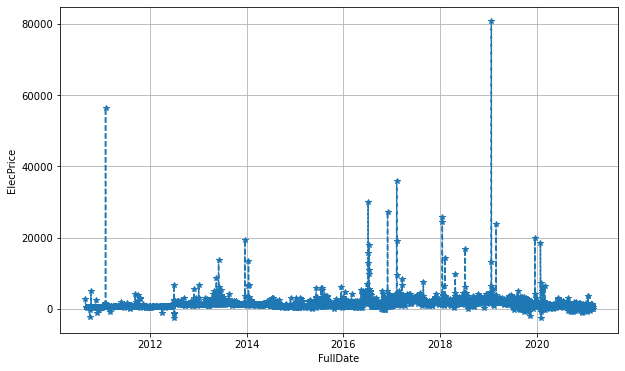

In [8]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(data.index, data.ElecPrice, '--' , marker= '*' , )
plt.grid()
plt.xlabel('FullDate')
plt.ylabel('ElecPrice')

In [9]:
adf_result = adfuller(data['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f' {k} : {v} ') 

ADF Statistic: -3.690158988836651
p-value: 0.00425372550457405
No. of lags used: 30
No. of observations used : 3803
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


###### The p-value of SysLoad column is 0.004254 

In [10]:
adf_result = adfuller(data['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f' {k} : {v} ') 

ADF Statistic: -2.902766697165178
p-value: 0.04502721288462563
No. of lags used: 27
No. of observations used : 3806
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


###### The 10% and 5% critical calues of GasLoad colum is -2.5672 and -2.8623

In [11]:
adf_result = adfuller(data['ElecPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[ 1 ]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
 print(f' {k} : {v} ') 

ADF Statistic: -8.269053866873824
p-value: 4.848817773711018e-13
No. of lags used: 20
No. of observations used : 3813
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


###### The 10% and 5% critical calues of ElecPrice colum is -2.5672 and -2.8623

In [6]:
data.reset_index(inplace = True)

In [7]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [14]:
d1 = data[['FullDate', 'ElecPrice']]

In [15]:
d1.rename(columns = {'FullDate': 'ds', 'ElecPrice': 'y'}, inplace = True)

In [16]:
d1.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [17]:
d1_train = d1[:2757]
d1_test = d1[2757:]

In [18]:
len(d1_train)

2757

In [19]:
model = Prophet()
model.fit(d1_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.20632


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        8006.4    0.00216177       310.474           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       8006.71   7.44419e-05       135.249   9.694e-07       0.001      181  LS failed, Hessian reset 
     196       8007.09   4.76901e-05       183.752   2.615e-07       0.001      329  LS failed, Hessian reset 
     199       8007.11   8.85542e-05        88.833           1           1      332   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       8007.18   3.55147e-05       90.9021   6.192e-07       0.001      407  LS failed, Hessian reset 
     299       8007.58    0.00064543       121.193           1           1      518   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       8007.61   2.09949e-05  

In [20]:
future = model.make_future_dataframe(periods = len(d1_test), freq = '1D')

In [21]:
future

,ds
0,2010-09-01
1,2010-09-02
2,2010-09-03
3,2010-09-04
4,2010-09-05
...,...
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27


In [22]:
len(future)

3834

In [23]:
preds = model.predict(future)

In [24]:
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,840.429280,-1126.563055,3505.793511,840.429280,840.429280,143.908258,143.908258,143.908258,159.365923,159.365923,159.365923,-15.457665,-15.457665,-15.457665,0.0,0.0,0.0,984.337538
1,2010-09-02,840.416074,-1082.454679,3403.560202,840.416074,840.416074,224.278578,224.278578,224.278578,257.123557,257.123557,257.123557,-32.844980,-32.844980,-32.844980,0.0,0.0,0.0,1064.694651
2,2010-09-03,840.402867,-1553.325448,3297.035718,840.402867,840.402867,-0.690824,-0.690824,-0.690824,50.279368,50.279368,50.279368,-50.970192,-50.970192,-50.970192,0.0,0.0,0.0,839.712043
3,2010-09-04,840.389661,-1813.790080,2813.246451,840.389661,840.389661,-340.950574,-340.950574,-340.950574,-271.451731,-271.451731,-271.451731,-69.498843,-69.498843,-69.498843,0.0,0.0,0.0,499.439087
4,2010-09-05,840.376455,-1906.065376,2730.526450,840.376455,840.376455,-430.862499,-430.862499,-430.862499,-342.737586,-342.737586,-342.737586,-88.124913,-88.124913,-88.124913,0.0,0.0,0.0,409.513956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,2021-02-24,3512.686681,426.120671,6577.652066,1755.778598,5127.912237,-88.840265,-88.840265,-88.840265,159.365923,159.365923,159.365923,-248.206188,-248.206188,-248.206188,0.0,0.0,0.0,3423.846416
3830,2021-02-25,3513.464306,546.544719,6463.186073,1755.646021,5131.676430,-22.763377,-22.763377,-22.763377,257.123557,257.123557,257.123557,-279.886935,-279.886935,-279.886935,0.0,0.0,0.0,3490.700928
3831,2021-02-26,3514.241930,65.956240,6254.849227,1755.513443,5135.440623,-256.746330,-256.746330,-256.746330,50.279368,50.279368,50.279368,-307.025698,-307.025698,-307.025698,0.0,0.0,0.0,3257.495600
3832,2021-02-27,3515.019555,-162.744825,5869.294220,1755.380866,5138.958836,-600.880480,-600.880480,-600.880480,-271.451731,-271.451731,-271.451731,-329.428749,-329.428749,-329.428749,0.0,0.0,0.0,2914.139075


In [25]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)) * 100

In [26]:
MAPE = mape(d1_test['y'], preds['yhat'])

In [29]:
print(round(MAPE, 2))

541.22


###### The answer to Q14 is 541.22

In [30]:
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

In [31]:
RMSE = rmse(d1_test['y'], preds['yhat'])
print(round(RMSE, 2))

3200.73


###### The answer to Q15 is 3200.73

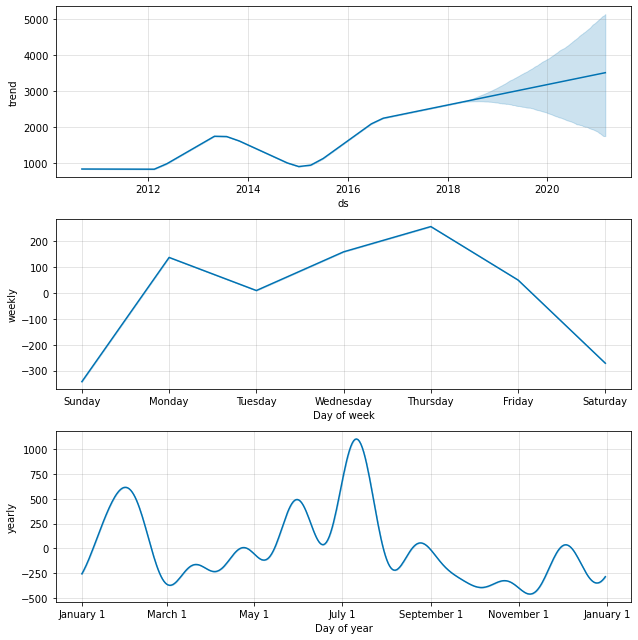

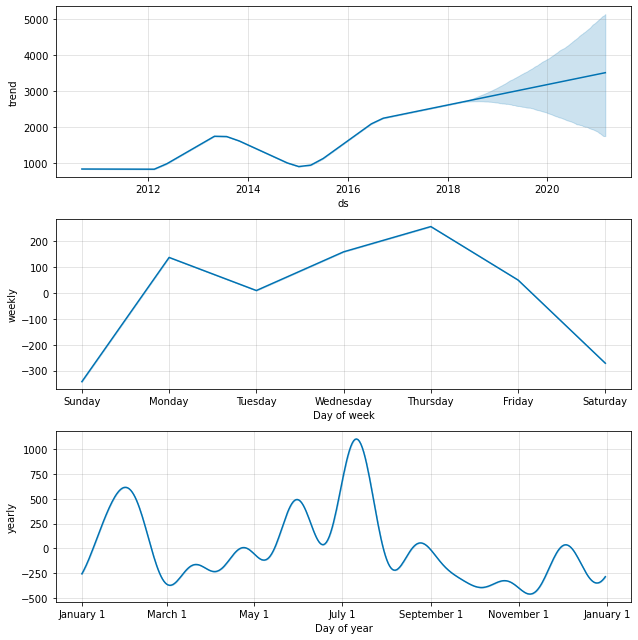

In [32]:
model.plot_components(preds)

###### The answer to Q16 is July

In [7]:
data.rename(columns = {'FullDate': 'ds', 'SysLoad': 'add1', 'Tmax': 'add2', 'GasPrice': 'add3', 'ElecPrice': 'y'}, inplace = True)

In [8]:
data.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [9]:
model = Prophet()

model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

In [10]:
data_train = data[:2757]
data_test = data[2757:]

In [12]:
model.fit(data_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.20632


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8218.46   0.000677286       367.554           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       8219.42   7.58132e-05       78.4085      0.3222           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       8219.42   1.50838e-05       71.6498   1.924e-07       0.001      270  LS failed, Hessian reset 
     299       8219.68   9.56684e-05       58.8423           1           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352        8219.8   2.43942e-05       100.216   1.126e-07       0.001      521  LS failed, Hessian reset 
     399       8219.83    1.5784e-05       62.0343           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha

In [13]:
future = model.make_future_dataframe(periods = len(data_test), freq = '1D')

In [14]:
future['add1'] = data['add1']
future['add2'] = data['add2']
future['add3'] = data['add3']

In [15]:
preds = model.predict(future)

In [16]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

In [18]:
MAPE = mape(data_test['y'], preds['yhat'])
print(round(MAPE, 2))

240.56


###### The answer to Q17 is 240.56

In [19]:
def rmse(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))

In [20]:
RMSE = rmse(data_test['y'], preds['yhat'])
print(round(RMSE, 2))

2717.04


###### The answer to Q18 is 2717.04

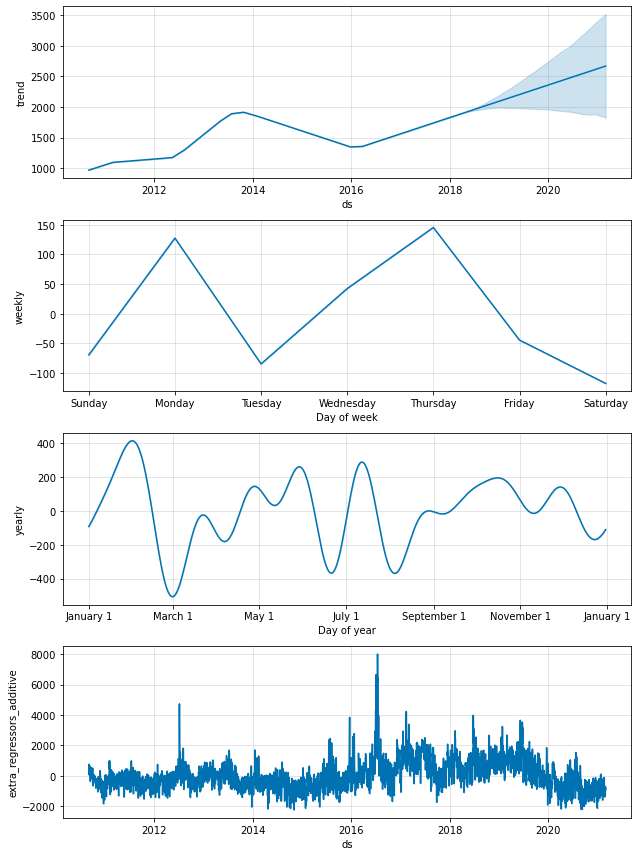

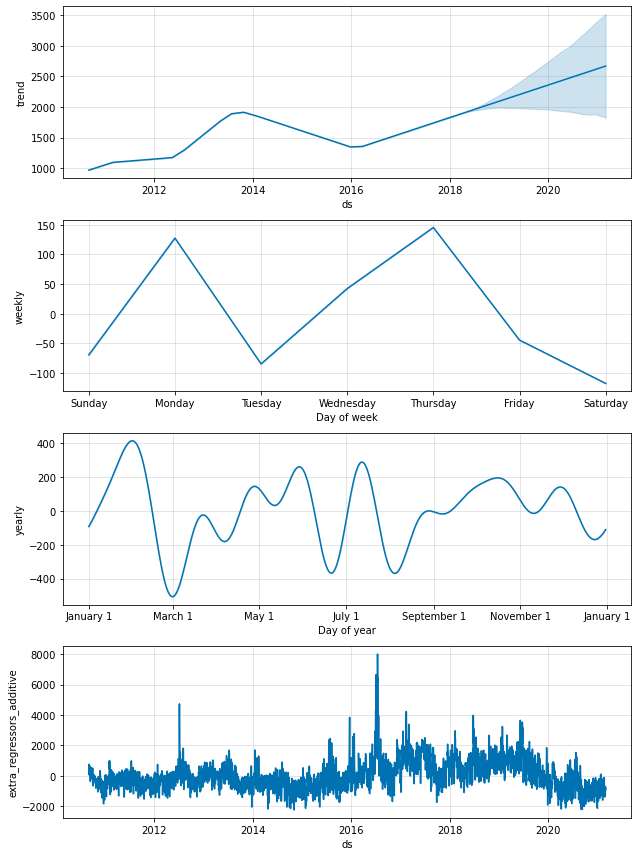

In [21]:
model.plot_components(preds)

###### The answer to Q19 is Thursday

In [10]:
data.drop(['Tmax'], axis = 1, inplace = True)

In [11]:
data.rename(columns = {'FullDate': 'ds', 'SysLoad': 'add1','GasPrice': 'add3', 'ElecPrice': 'y'}, inplace = True)
data.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [12]:
model = Prophet()

model.add_regressor('add1')
model.add_regressor('add3')

In [13]:
data_train = data[:2757]
data_test = data[2757:]

In [14]:
model.fit(data_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.20632


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8218.57    0.00267072        303.56           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       8219.38   7.61766e-05       143.637   8.735e-07       0.001      235  LS failed, Hessian reset 
     199       8219.44   0.000283104       260.508           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       8219.62   0.000128879       130.949   1.426e-06       0.001      423  LS failed, Hessian reset 
     299       8219.66   5.70263e-05       77.2462           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       8219.79   3.77127e-05       149.613   1.321e-07       0.001      582  LS failed, Hessian reset 
     399       8219.84    5.0186e-06  

In [15]:
future = model.make_future_dataframe(periods = len(data_test), freq = '1D')

In [16]:
future['add1'] = data['add1']
future['add3'] = data['add3']

In [17]:
preds = model.predict(future)

In [18]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

In [19]:
MAPE = mape(data_test['y'], preds['yhat'])
print(round(MAPE, 2))

231.82


###### The answer to Q20 is 231.82